In [1]:
# Gerekli kütüphanelerin importu
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dosya yolu
file_path = '/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv'

# Veri setinin pandasla yüklenmesi
df = pd.read_csv(file_path)

# İlk 5 satır
print(df.head()) 

   VIN (1-10)    County       City State  Postal Code  Model Year       Make  \
0  JTMAB3FV3P    Kitsap    Seabeck    WA      98380.0        2023     TOYOTA   
1  1N4AZ1CP6J    Kitsap  Bremerton    WA      98312.0        2018     NISSAN   
2  5YJ3E1EA4L      King    Seattle    WA      98101.0        2020      TESLA   
3  1N4AZ0CP8E      King    Seattle    WA      98125.0        2014     NISSAN   
4  1G1FX6S00H  Thurston       Yelm    WA      98597.0        2017  CHEVROLET   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        LEAF          Battery Electric Vehicle (BEV)   
2     MODEL 3          Battery Electric Vehicle (BEV)   
3        LEAF          Battery Electric Vehicle (BEV)   
4     BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            42.0   
1           Clean Alternative Fuel

**Veri setinin sütun adları, veri tipleri ve boyutu hakkında bilgi edinmek için info() metodu kullanıldı. Ayrıca, sayısal sütunların istatistiksel özetini almak için describe() kullanıldı.**

In [2]:
# Veri seti hakkında temel bilgiler
print(df.info())

# Sayısal değişkenlerin istatistiksel özetini alalım
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

**Veri setine, rastgele seçilen hücrelere %5 oranında eksik değer (NaN) eklendi. Bu işlem için veri setinin toplam hücre sayısı hesaplanıp, rastgele satır ve sütunlar seçildi.**

In [3]:
# Bazı sütunlara NaN değerler ekleme
# Öncelikle veri setinin toplam boyutunu alalım
total_cells = df.size

# Rastgele eksik değerlerin eklenmesi için %5 oran seçtim
nan_ratio = 0.05  # %5 eksik veri
nan_count = int(total_cells * nan_ratio)  # Eklenmesi gereken eksik değer sayısı

# Veri setinin boyutlarına göre rastgele satır ve sütunlar seçme
np.random.seed(42)  # Sonuçların tekrarlanabilir olması için sabit seed
rows = np.random.randint(0, df.shape[0], nan_count)
cols = np.random.randint(0, df.shape[1], nan_count)

# Rastgele seçilen hücrelere "NaN" değer atama
df_copy = df.copy()  # Orijinal veri setini korumak için bir kopya aldım
for row, col in zip(rows, cols):
    df_copy.iloc[row, col] = np.nan

# Eksik veri eklenmiş veri setinin ilk birkaç satırı
print(df_copy.head())

# Yeni veri setinin toplam eksik veri sayısını kontrolü
print(df_copy.isnull().sum())

   VIN (1-10)    County       City State  Postal Code  Model Year       Make  \
0  JTMAB3FV3P    Kitsap    Seabeck    WA      98380.0      2023.0     TOYOTA   
1  1N4AZ1CP6J    Kitsap  Bremerton    WA      98312.0      2018.0     NISSAN   
2  5YJ3E1EA4L      King    Seattle    WA      98101.0      2020.0      TESLA   
3  1N4AZ0CP8E      King    Seattle    WA      98125.0      2014.0     NISSAN   
4  1G1FX6S00H  Thurston       Yelm    WA      98597.0      2017.0  CHEVROLET   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        LEAF          Battery Electric Vehicle (BEV)   
2     MODEL 3          Battery Electric Vehicle (BEV)   
3        LEAF          Battery Electric Vehicle (BEV)   
4     BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            42.0   
1           Clean Alternative Fuel

**Eksik veri eklenmiş veri seti bir CSV dosyasına kaydedildi ve ardından yeniden okundu. Veri setinin yapısını kontrol etmek için info() metodu kullanıldı.**

In [4]:
# NaN değerlerle değiştirilmiş veri setini kaydetme
df_copy.to_csv('Modified_Electric_Vehicle_Data.csv', index=False)

# Yeni veri setini yeniden okuma
df_with_nan = pd.read_csv('Modified_Electric_Vehicle_Data.csv')

# Yeni veri setinin genel yapısını inceleyeme
print(df_with_nan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         195435 non-null  object 
 1   County                                             195275 non-null  object 
 2   City                                               195424 non-null  object 
 3   State                                              195427 non-null  object 
 4   Postal Code                                        195243 non-null  float64
 5   Model Year                                         195453 non-null  float64
 6   Make                                               195487 non-null  object 
 7   Model                                              195390 non-null  object 
 8   Electric Vehicle Type                              195384 non-null  object

**Eksik veri oranları sütun bazında hesaplandı ve bir çubuk grafikle görselleştirildi. Bu analiz, hangi sütunlarda daha fazla eksik veri olduğunu belirlemek için kullanıldı.**

Sütun Bazında Eksik Veri Oranları (%):
 VIN (1-10)                                           4.869572
County                                               4.947454
City                                                 4.874926
State                                                4.873466
Postal Code                                          4.963030
Model Year                                           4.860810
Make                                                 4.844260
Model                                                4.891476
Electric Vehicle Type                                4.894397
Clean Alternative Fuel Vehicle (CAFV) Eligibility    4.817975
Electric Range                                       4.868598
Base MSRP                                            4.832091
Legislative District                                 5.043346
DOL Vehicle ID                                       4.806780
Vehicle Location                                     4.904132
Electric Utility              

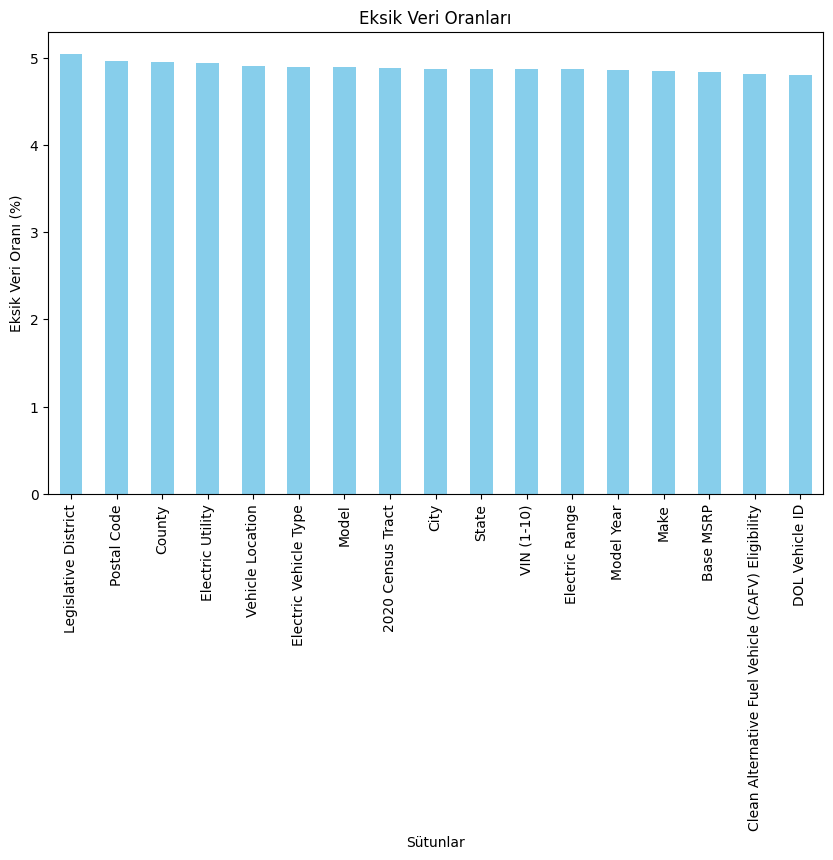

In [5]:
# Eksik verilerin sütun bazında oranlarını hesaplayalım
missing_data = df_with_nan.isnull().sum() / len(df_with_nan) * 100
print("Sütun Bazında Eksik Veri Oranları (%):\n", missing_data)

# Eksik verileri görselleştirelim
plt.figure(figsize=(10, 6))
missing_data.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Eksik Veri Oranları")
plt.ylabel("Eksik Veri Oranı (%)")
plt.xlabel("Sütunlar")
plt.show()

**Eksik değerler sayısal sütunlar için sütunların ortalama değeriyle, kategorik sütunlar için en sık görülen değerle (mod) dolduruldu. Ardından eksik veri sayısının sıfırlandığı kontrol edildi.**

In [6]:
# Sayısal sütunlar için ortalama ile doldurma
numeric_cols = df_with_nan.select_dtypes(include=['float64', 'int64']).columns
df_with_nan[numeric_cols] = df_with_nan[numeric_cols].fillna(df_with_nan[numeric_cols].mean())

# Kategorik sütunlar için mod (en sık değer) ile doldurma
categorical_cols = df_with_nan.select_dtypes(include=['object']).columns
df_with_nan[categorical_cols] = df_with_nan[categorical_cols].fillna(df_with_nan[categorical_cols].mode().iloc[0])

# Doldurulan verileri kaydedelilmesi ve kontrolü
print("Eksik verilerin yönetiminden sonra toplam eksik veri sayısı:")
print(df_with_nan.isnull().sum().sum())

Eksik verilerin yönetiminden sonra toplam eksik veri sayısı:
0


**Veri setindeki en popüler araç marka-model kombinasyonu groupby ile bulundu. Elektrikli araçların menzil ve fiyat istatistiksel dağılımı analiz edildi.**

In [7]:
# En popüler marka ve model kombinasyonunu bulma
popular_combination = df.groupby(['Make', 'Model']).size().sort_values(ascending=False).head(1)
print("En popüler marka ve model kombinasyonu:")
print(popular_combination)

# Elektrikli araçların menzil ve fiyat istatistikleri
print("\nElektrikli araçların menzil (Electric Range) istatistikleri:")
print(df['Electric Range'].describe())

print("\nElektrikli araçların fiyat (Base MSRP) istatistikleri:")
print(df['Base MSRP'].describe())

En popüler marka ve model kombinasyonu:
Make   Model  
TESLA  MODEL Y    43437
dtype: int64

Elektrikli araçların menzil (Electric Range) istatistikleri:
count    205431.000000
mean         52.164342
std          88.075859
min           0.000000
25%           0.000000
50%           0.000000
75%          48.000000
max         337.000000
Name: Electric Range, dtype: float64

Elektrikli araçların fiyat (Base MSRP) istatistikleri:
count    205431.000000
mean        922.670532
std        7761.753602
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64


**Elektrikli araçların menzil (Electric Range) ve fiyat (Base MSRP) değerlerinin dağılımı histogramlarla görselleştirildi. Fiyat analizinde 100.000 USD’ye kadar sınırlama getirildi.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


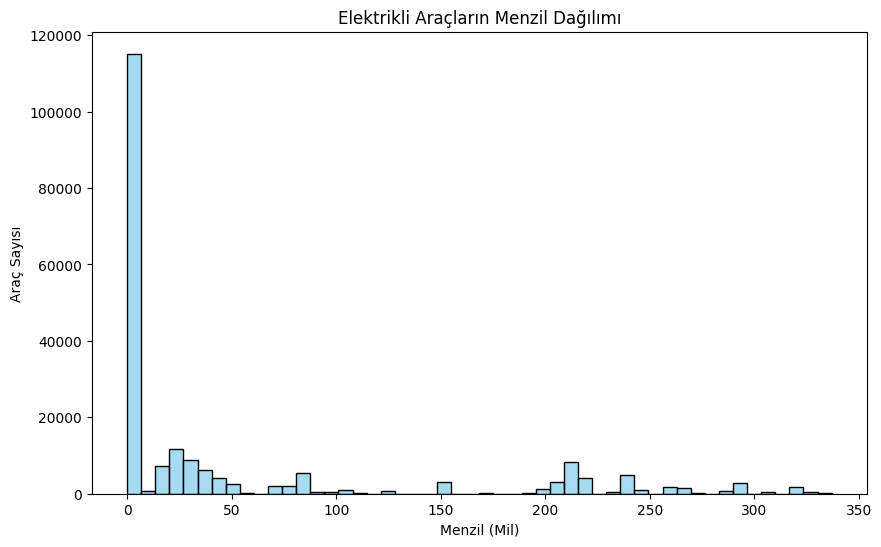

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


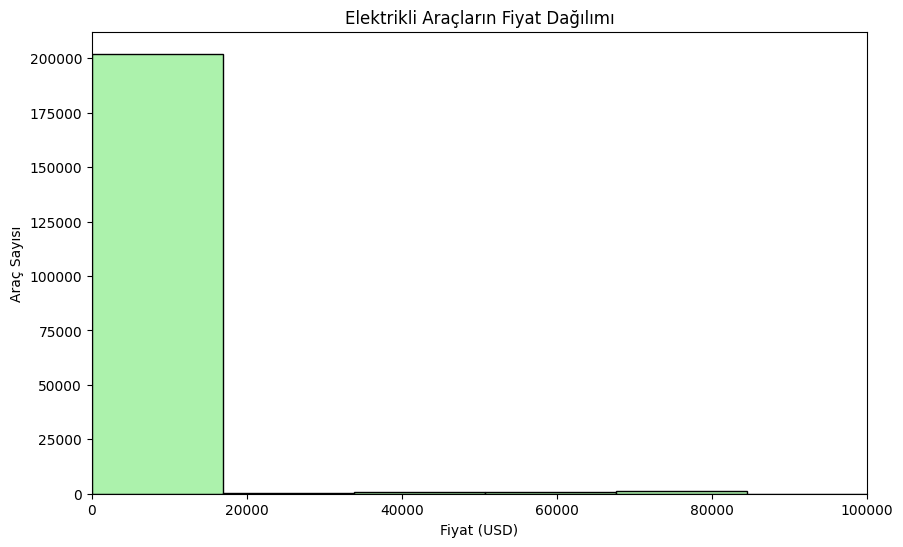

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menzil dağılımı histogramı
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=50, kde=False, color='skyblue')
plt.title('Elektrikli Araçların Menzil Dağılımı')
plt.xlabel('Menzil (Mil)')
plt.ylabel('Araç Sayısı')
plt.show()

# Fiyat dağılımı histogramı
plt.figure(figsize=(10, 6))
sns.histplot(df['Base MSRP'], bins=50, kde=False, color='lightgreen')
plt.title('Elektrikli Araçların Fiyat Dağılımı')
plt.xlabel('Fiyat (USD)')
plt.ylabel('Araç Sayısı')
plt.xlim(0, 100000)  # Daha net bir analiz için fiyatı 100,000$'a kadar sınırlandırıyoruz.
plt.show()

**Grafik Analizi ve Yorumu :** 

**1)** Elektrikli Araçların Menzil Dağılımı: İlk grafikte, elektrikli araçların menzil dağılımı histogramı yer almaktadır.Grafikte yatay eksen (x ekseni), araçların tam şarj ile kat edebileceği menzil değerlerini (km), dikey eksen (y ekseni) ise araç sayısını göstermektedir.
Histogramda, menzil değerlerinin çoğunlukla 0-100 km arasında yoğunlaştığı görülmektedir. Bu durum, elektrikli araç piyasasında kısa menzilli araçların daha fazla üretildiğini veya tercih edildiğini gösterebilir.
200 km üzerindeki menzil değerlerinde araç sayısının belirgin şekilde azaldığı gözlemlenmektedir. Bu uzun menzilli araçların daha az üretildiğini veya nadir bulunduğunu işaret edebilir. 

**2)** Elektrikli Araçların Fiyat Dağılımı: İkinci grafikte, elektrikli araçların fiyat dağılımı gösterilmiştir.
Yatay eksen (x ekseni) araç fiyatlarını, dikey eksen (y ekseni) ise fiyat aralıklarına giren araç sayısını ifade etmektedir.
Fiyatların büyük çoğunluğunun 0-100,000 birim arasında yoğunlaştığı anlaşılmaktadır. Bu aralık, muhtemelen uygun fiyatlı modellerin yaygın olduğunu ve tüketici kitlesine hitap ettiğini göstermektedir.
Daha yüksek fiyat seviyelerinde (örneğin 200,000 birim ve üzeri), araç sayısında kayda değer bir azalma gözlemlenmektedir. Bu durum, premium segment araçların daha az sayıda üretildiğini veya pazar payının sınırlı olduğunu işaret edebilir.

**Sayısal sütunlar için standart sapma, medyan ve mod değerleri hesaplanarak veri setinin dağılım özellikleri analiz edildi.**


**select_dtypes(include=['float64', 'int64']):** Bu fonksiyon, veri setindeki yalnızca sayısal sütunları (yani, float64 ve int64 türündeki verileri) seçmek için kullanılır. Böylece sadece sayısal verilere odaklanılır.

**std():** Bu fonksiyon, her bir sayısal sütun için standart sapmayı hesaplar. Standart sapma, verinin ortalamadan ne kadar uzaklaştığını gösteren bir ölçüttür.

**median():** Bu fonksiyon, her bir sayısal sütun için medyanı hesaplar. Medyan, verilerin sıralandıktan sonra ortada kalan değeri ifade eder ve uç değerlerden etkilenmez.

**mode():**  Bu fonksiyon, her bir sayısal sütun için mod değerini hesaplar. Mod, veride en sık görülen değeri temsil


 eder.

In [9]:
# Yalnızca sayısal sütunları seçme
sayisal_df = df.select_dtypes(include=['float64', 'int64'])

# Standart Sapma Hesaplama
standart_sapma = sayisal_df.std()
print("Standart Sapma:")
print(standart_sapma)

# Medyan Hesaplama
medyan = sayisal_df.median()
print("Medyan:")
print(medyan)

# Mod Hesaplama
mod = sayisal_df.mode().iloc[0]  # İlk mod değeri alınır
print("Mod:")
print(mod)

Standart Sapma:
Postal Code             2.419037e+03
Model Year              2.989059e+00
Electric Range          8.807586e+01
Base MSRP               7.761754e+03
Legislative District    1.491005e+01
DOL Vehicle ID          7.205737e+07
2020 Census Tract       1.588435e+09
dtype: float64
Medyan:
Postal Code             9.812500e+04
Model Year              2.022000e+03
Electric Range          0.000000e+00
Base MSRP               0.000000e+00
Legislative District    3.300000e+01
DOL Vehicle ID          2.382368e+08
2020 Census Tract       5.303303e+10
dtype: float64
Mod:
Postal Code             9.805200e+04
Model Year              2.023000e+03
Electric Range          0.000000e+00
Base MSRP               0.000000e+00
Legislative District    4.100000e+01
DOL Vehicle ID          4.469000e+03
2020 Census Tract       5.303303e+10
Name: 0, dtype: float64



**Boxplot ile uç değerler görselleştirildi. Scatter plot ile Model Year ve Electric Range değişkenleri arasındaki ilişki analiz edildi. Korelasyon Matrisi ile değişkenler arasındaki ilişkiler heatmap olarak gösterildi.**

**Kutu Grafikleri (Boxplot):** sns.boxplot(data=sayisal_df) fonksiyonu ile sayısal verilerin her bir sütunu için kutu grafiği oluşturuldu. Bu grafik, verinin medyanını, çeyreklerini (Q1, Q3) ve uç değerleri (outliers) gösteriyor. plt.xticks(rotation=90) ile etiketlerin okunabilirliği artırıldı.

**Scatter Plot:** sns.scatterplot(data=sayisal_df, x='Model Year', y='Electric Range') fonksiyonu ile Model Year ve Electric Range değişkenleri arasındaki ilişkiyi görselleştiren bir scatter plot oluşturuldu. Bu grafik, iki değişken arasındaki doğrusal olmayan ilişkiyi gözlemlemek için kullanılıyor.

**Korelasyon Matrisi ve Heatmap:** sayisal_df.corr() fonksiyonu ile sayısal değişkenler arasındaki korelasyon hesaplanıp, sns.heatmap() fonksiyonu ile korelasyon matrisi görselleştirildi. Bu ısı haritası, değişkenler arasındaki ilişkiyi renkli bir biçimde gösteriyor; yüksek korelasyonlar sıcak renklerle, düşük korelasyonlar ise soğuk renklerle belirtiliyor.


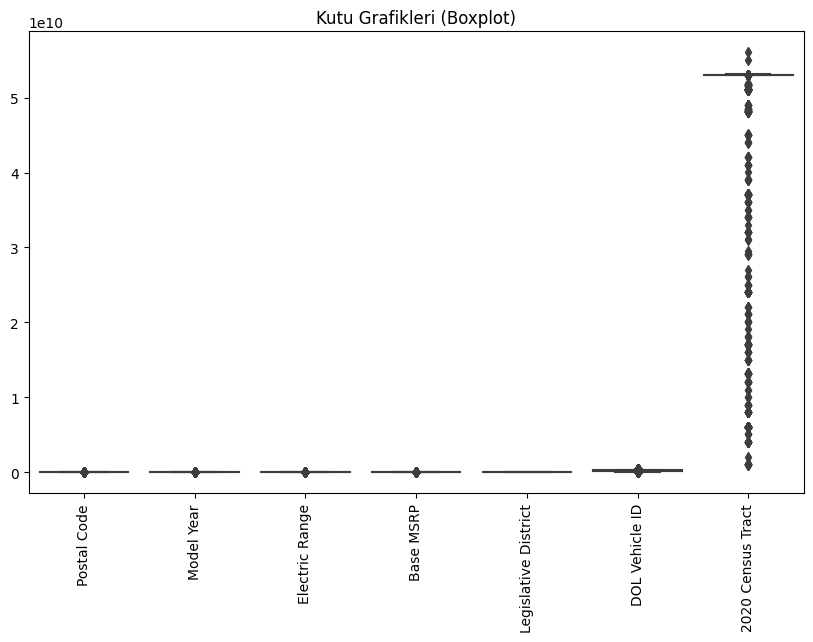

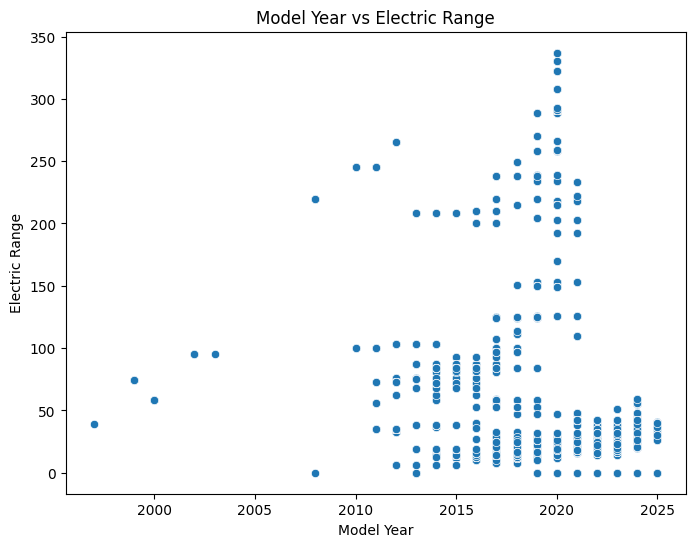

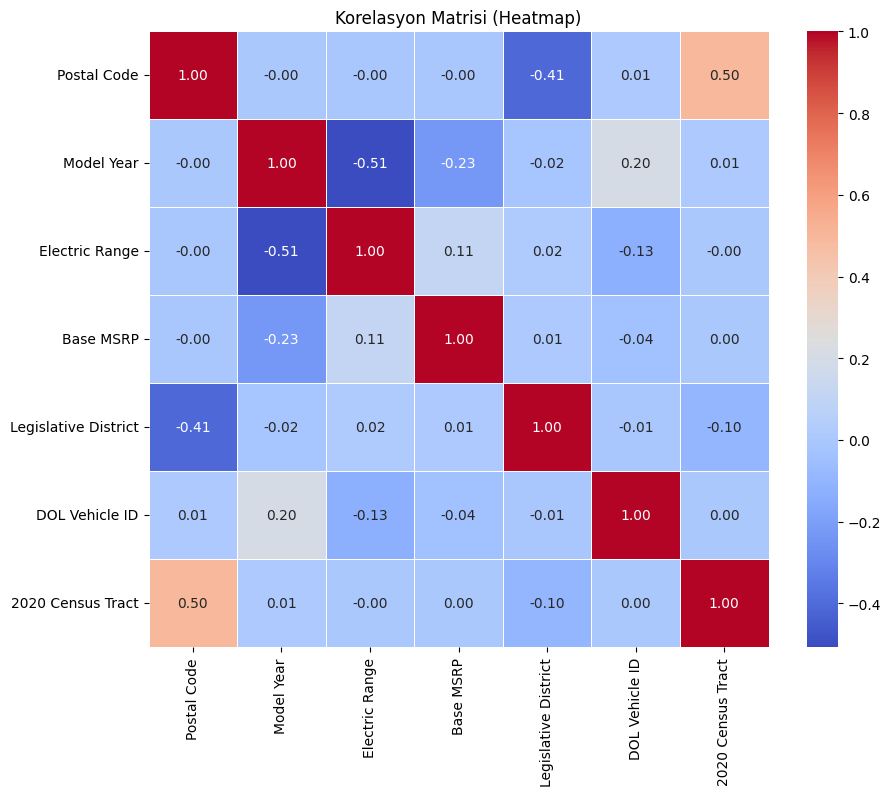

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Kutu Grafikleri (Boxplot) - Uç Değerleri Görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(data=sayisal_df)
plt.title('Kutu Grafikleri (Boxplot)')
plt.xticks(rotation=90)
plt.show()

# 2. Scatter Plot - Değişkenler Arasındaki İlişkileri Görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sayisal_df, x='Model Year', y='Electric Range')
plt.title('Model Year vs Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()

# 3. Korelasyon Matrisi ve Heatmap
plt.figure(figsize=(10, 8))
korrelasyon = sayisal_df.corr()  # Korelasyon matrisini hesapla
sns.heatmap(korrelasyon, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi (Heatmap)')
plt.show()


**Korelasyon matrisindeki yüksek korelasyonlu özellikler (ör. 0.9 üzeri) belirlendi.Yeni bir özellik olarak Price per Electric Range (Fiyat / Elektrik Menzili) hesaplanarak veri setine eklendi.**

Çıktı olarak, her bir özelliğin kendisiyle yüksek korelasyona sahip olduğu görüldü. Bu, veri setinde bazı özelliklerin birbirinin tekrarı olabileceğini gösteriyor.

Ardından, Price per Electric Range adında yeni bir özellik ekledim. Bu özellik, elektrikli menzil (Electric Range) ile fiyatın (Base MSRP) oranını temsil ediyor. Ancak, tüm elektrikli araçların fiyatları 0 olduğu için bu yeni özelliğin değerleri de sıfır çıktı.

Korelasyon matrisinin çıktısı, özellikle her değişkenin kendisiyle yüksek korelasyona sahip olduğunu gösteriyor. Bu da modelde bazı değişkenlerin gereksiz olabileceği anlamına gelir ve daha fazla özellik seçimi yaparak modelin karmaşıklığını azaltabilirim.

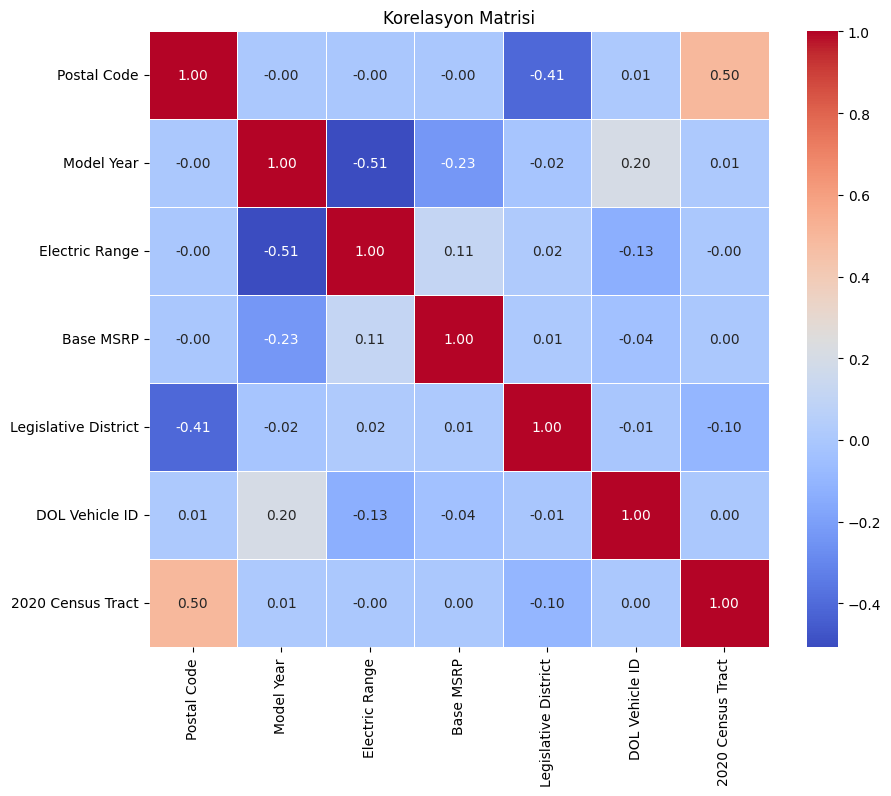

Yüksek Korelasyona Sahip Özellikler: [('Postal Code', 'Postal Code'), ('Model Year', 'Model Year'), ('Electric Range', 'Electric Range'), ('Base MSRP', 'Base MSRP'), ('Legislative District', 'Legislative District'), ('DOL Vehicle ID', 'DOL Vehicle ID'), ('2020 Census Tract', '2020 Census Tract')]
   Base MSRP  Electric Range  Price per Electric Range
0        0.0            42.0                       0.0
1        0.0           151.0                       0.0
2        0.0           266.0                       0.0
3        0.0            84.0                       0.0
4        0.0           238.0                       0.0


In [11]:
# Korelasyon Matrisi Hesaplama
kor = sayisal_df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10,8))
sns.heatmap(kor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

# Yüksek korelasyona sahip değişkenlerin seçilmesi (örneğin 0.9'un üzeri)
yuksek_korelasyon = kor[kor > 0.9].stack().index.tolist()
print("Yüksek Korelasyona Sahip Özellikler:", yuksek_korelasyon)

# Yeni özellikler ekleme (Örneğin, fiyatın elektrik menziline bölünmesi)
sayisal_df['Price per Electric Range'] = sayisal_df['Base MSRP'] / sayisal_df['Electric Range']

# Yeni oluşturulan özellikleri kontrol etme
print(sayisal_df[['Base MSRP', 'Electric Range', 'Price per Electric Range']].head())